In [84]:
import pandas as pd

DATA_PATH = '../Campaign3/o2_download_nexus5x.csv'

data = pd.read_csv(DATA_PATH)

print(data.head())

def get_data():
    return data

    chipsettime  cellid  mcs0  mcs1  mcsindex   tbs0   tbs1  mimo     rnti  \
0  1.523008e+09   470.0  QPSK  QPSK         1  144.0    0.0     1  65534.0   
1  1.523008e+09   470.0  QPSK  QPSK         1  144.0    0.0     1  65534.0   
2  1.523008e+09   470.0  QPSK  QPSK         1  328.0  328.0     2  49660.0   
3  1.523008e+09   470.0  QPSK  QPSK         1  256.0  408.0     2  49660.0   
4  1.523008e+09   470.0  QPSK  QPSK         1  144.0    0.0     1  65534.0   

   throughput  ...  caindex       gpstime  longitude  latitude  speed  \
0       0.144  ...        0  1.523007e+09   8.433848   49.9766    0.0   
1       0.144  ...        0  1.523007e+09   8.433848   49.9766    0.0   
2       0.656  ...        0  1.523007e+09   8.433848   49.9766    0.0   
3       0.664  ...        0  1.523007e+09   8.433848   49.9766    0.0   
4       0.144  ...        0  1.523007e+09   8.433848   49.9766    0.0   

      rsrq     rsrp     rssi  earfcn  cqi  
0 -14.1250 -96.5625 -64.3125    1600   10  
1  -

### Eksploracja danych

In [85]:
# Podstawowe statystyki dla danych numerycznych
print(data.describe())

# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Sprawdzenie unikalnych wartości dla niektórych kolumn
print(data['mcs0'].unique())
print(data["mcs0"].unique())
print(data["mcsindex"].unique())
print(data["mimo"].unique())
print(data["caindex"].unique())


        chipsettime        cellid      mcsindex          tbs0          tbs1  \
count  5.050500e+04  50505.000000  50505.000000  50505.000000  50505.000000   
mean   1.523042e+09    166.817563      1.844273   6642.791011    829.713335   
std    3.868954e+04     93.177136      0.699593   4611.836457   2676.582973   
min    1.523008e+09     41.000000      1.000000    120.000000      0.000000   
25%    1.523010e+09    104.000000      1.000000   3368.000000      0.000000   
50%    1.523016e+09    146.000000      2.000000   5736.000000      0.000000   
75%    1.523093e+09    155.000000      2.000000   8760.000000      0.000000   
max    1.523107e+09    491.000000      3.000000  31704.000000  25456.000000   

               mimo          rnti    throughput           rb0           rb1  \
count  50505.000000  50505.000000  50505.000000  50505.000000  50505.000000   
mean       1.143372  31701.414909      7.472504     31.362756     31.362756   
std        0.350455  19179.290748      5.728639    

In [86]:
# for column in data.columns:
#     print(column, data[column].unique())
print(data["mcs0"].unique())
print(data["mcsindex"].unique())
print(data["mimo"].unique())
print(data["caindex"].unique())


['QPSK' '16QAM' '64QAM']
[1 2 3]
[1 2]
[0 1]


### Eksploracja danych

In [87]:
# for column in data.columns:
#     print(column, data[column].unique())
print(data["mcs0"].unique())
print(data["mcsindex"].unique())
print(data["mimo"].unique())
print(data["caindex"].unique())


['QPSK' '16QAM' '64QAM']
[1 2 3]
[1 2]
[0 1]


### Jedziemy z tematem

szybkość dla pobieranych
szybkość dla wysyłanych
przepustowość

In [88]:
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# load data
my_data = get_data()
# print(my_data.head())

# cechy - rsrp, rsrq, cqi, longitude, latitude, speed
# cel - throughput
X = my_data[['rsrp', 'rsrq', 'cqi', 'longitude', 'latitude', 'speed']]
y = my_data['throughput']

# podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# tworzenie modelu
# model = GaussianNB()
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=42)

# trenowanie modelu
model.fit(X_train, y_train)

# predykcja
y_pred = model.predict(X_test)

# Ewaluacja modelu
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# f1 = f1_score(y_test, y_pred)
# print('F1:', f1)



MSE: 6.114345577332428


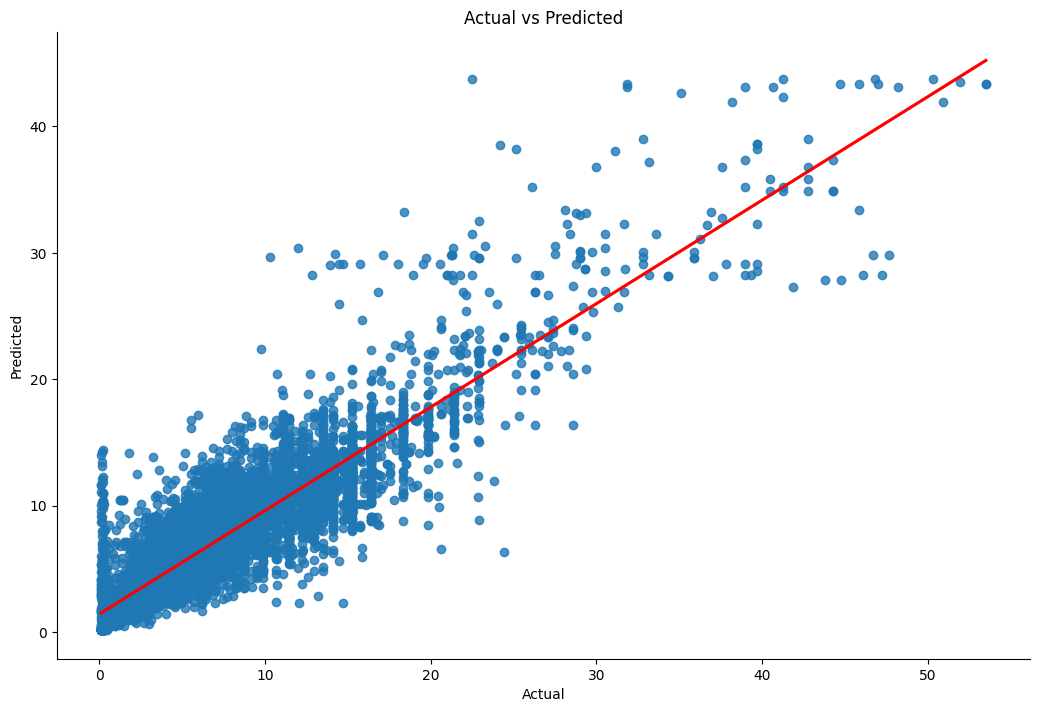

In [89]:
# Załóżmy, że y_test i y_pred są dostępne jako Series/DataFrame
# Tworzenie DataFrame do wizualizacji
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Wykres rozrzutu z liniami regresji
sns.lmplot(x='Actual', y='Predicted', data=df_plot, aspect=1.5, height=7, ci=None, line_kws={'color': 'red'})
plt.title('Actual vs Predicted')
plt.show()

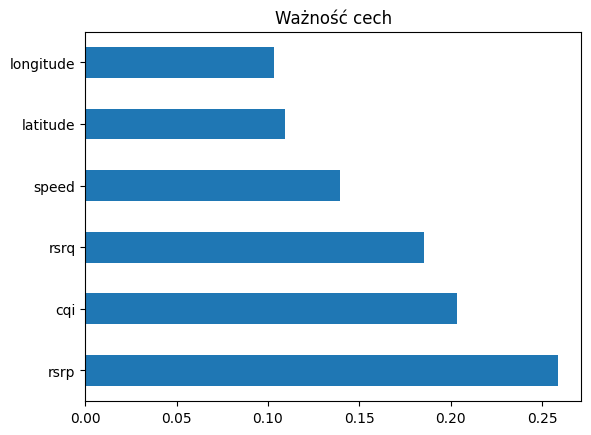

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')  # Wyświetla 10 najważniejszych cech
plt.title('Ważność cech')
plt.show()


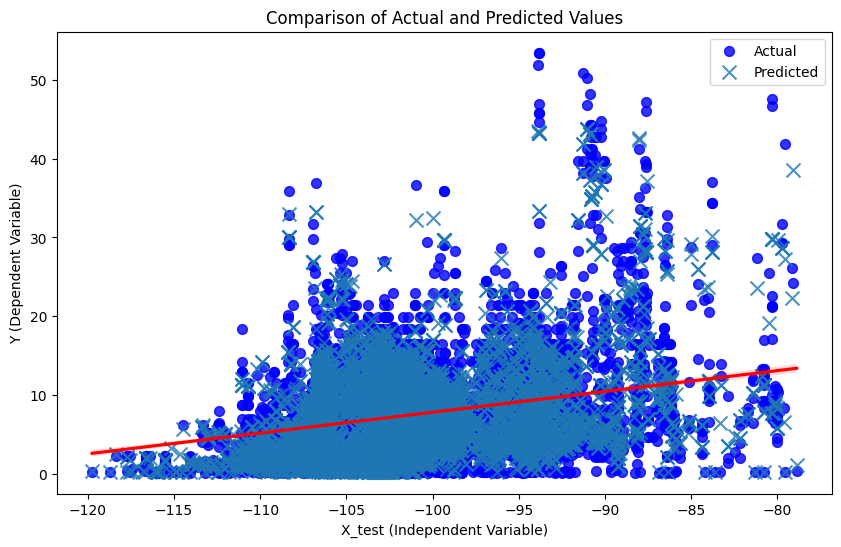

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Załóżmy, że masz już y_test i y_pred
# Przykładowe dane:
# y_test = [3, 2, 4, 5, 6]  # rzeczywiste wartości
# y_pred = [2.8, 2.1, 4.3, 4.9, 6.1]  # przewidywane wartości
# X_test = [1, 2, 3, 4, 5]  # zmienne niezależne, które mogły być używane w modelu

# Tworzenie DataFrame
df = pd.DataFrame({
    'X_test': X_test['rsrp'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
sns.regplot(x='X_test', y='Actual', data=df, scatter_kws={"s": 50}, label='Actual', color='blue', fit_reg=False)
sns.regplot(x='X_test', y='Predicted', data=df, scatter_kws={"s": 100}, line_kws={"color": "red"}, label='Predicted', marker='x')

plt.legend()
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('X_test (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.show()



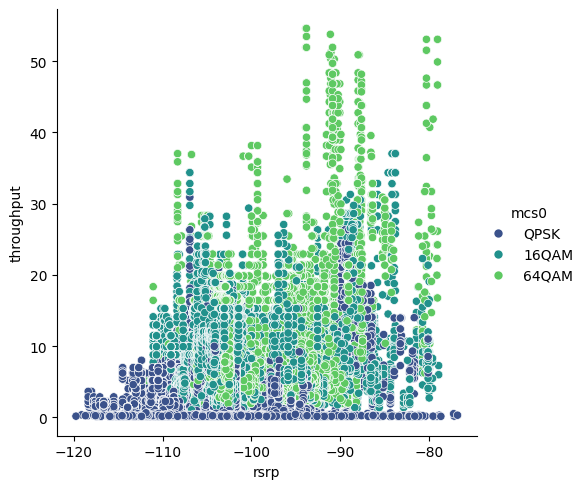

In [92]:
sns.relplot(x='rsrp', y='throughput', data=my_data, hue='mcs0', palette='viridis')

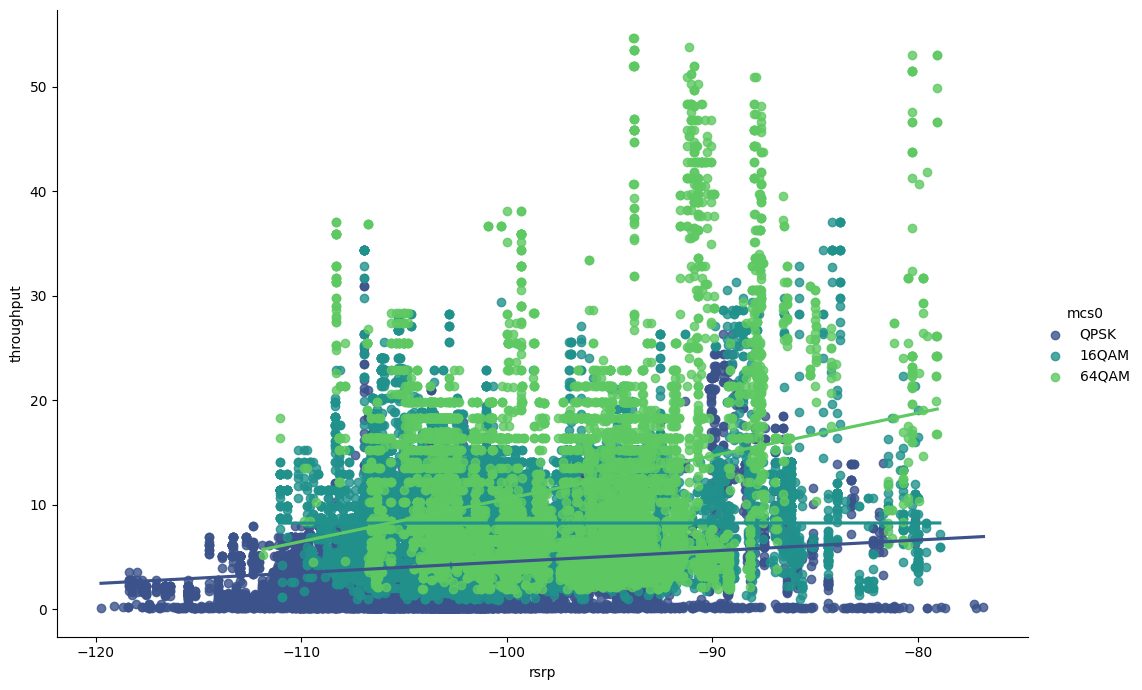

In [93]:
sns.lmplot(x='rsrp', y='throughput', data=my_data, hue='mcs0', palette='viridis', aspect=1.5, height=7, ci=None)

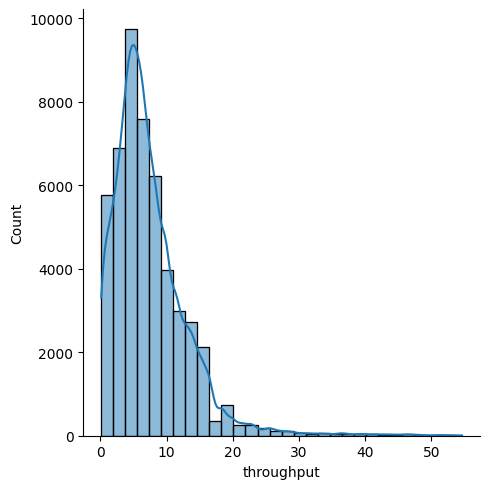

In [94]:
sns.displot(my_data['throughput'], kde=True, bins=30)

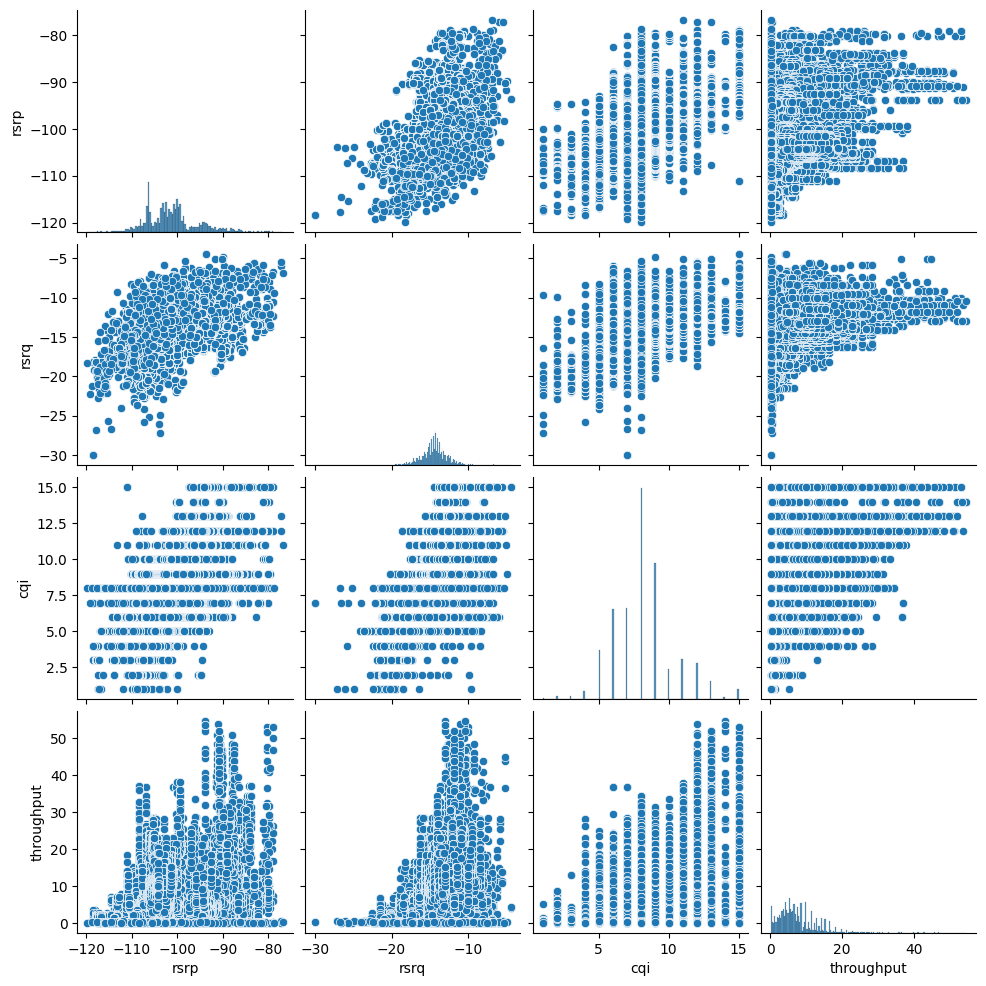

In [95]:
sns.pairplot(my_data[['rsrp', 'rsrq', 'cqi', 'throughput']])

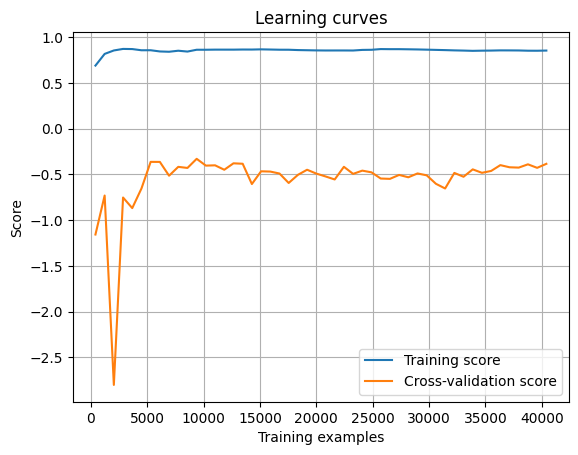

In [97]:
# learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# show learning curves
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()